In [32]:
import time
import datetime
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [33]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [81]:
PATH = r'C:\Users\44738\Desktop\Desktop Files\Dissertation\ftse_100.csv'
all_tickers = pd.read_csv(PATH)
start_date = '2016-07-01'
end_date = '2021-07-01'

In [68]:
screened_tickers = list(all_tickers['stocks'].iloc[:69])

In [69]:
append_str = '.L'
screened_all_tickers = [ticker + append_str for ticker in screened_tickers]

In [82]:
lse_tickers = list(all_tickers['stocks_all'])
append_str = '.L'
lse_all_tickers = [ticker + append_str for ticker in lse_tickers]

In [62]:
def value_at_risk(returns, confidence_level=.05):
    
    print('VaR:', returns.quantile(confidence_level, interpolation='higher'))
    # Calculating VaR
    return float(returns.quantile(confidence_level, interpolation='higher'))

In [63]:
def expected_shortfall(returns, confidence_level=.05):
    
    # Calculating VaR
    var = value_at_risk(returns, confidence_level)
    # ES is the average of the worst losses (under var)
    return float(returns[returns.lt(var)].mean())

In [49]:
tickers = ["^FTSE"]

In [50]:
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
ftse = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in tickers:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    ftse = pd.concat([ftse, df], axis=1)

In [56]:
ftse

,^FTSE
Date,
2016-07-01,6577.799805
2016-07-04,6522.299805
2016-07-05,6545.399902
2016-07-06,6463.600098
2016-07-07,6533.799805
...,...
2021-06-25,7136.100098
2021-06-28,7073.000000
2021-06-29,7087.600098


In [83]:
# Dont rerun
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
balanced = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in lse_all_tickers:
    try:
        query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
        df = pd.read_csv(query_string)
        df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        balanced = pd.concat([balanced, df], axis=1)
    except:
        print('No data for:', ticker)
balanced = balanced.iloc[1:]

In [84]:
balanced

,INF.L,ITRK.L,JMAT.L,MNDI.L,AUTO.L,HIK.L,HLMA.L,CPG.L,BDEV.L,CRDA.L,SPX.L,LGEN.L,NXT.L,MRO.L,SSE.L,WTB.L,SVT.L,MNG.L,PHNX.L,BNZL.L,WEIR.L,BT-A.L,SGRO.L,SKG.L,CCH.L,RKT.L,REL.L,WPP.L,BKG.L,BLND.L,STAN.L,RR.L,UU.L,ICP.L,RMV.L,III.L,LSEG.L,AHT.L,NWG.L,ABF.L,STJ.L,SDR.L,BRBY.L,SGE.L,RTO.L,PSN.L,LLOY.L,TW.L,ITV.L,OCDO.L,AV.L,SMDS.L,PSON.L,SMIN.L,TSCO.L,JD.L,AVV.L,BHP.L,HL.L,ANTO.L,LAND.L,NG.L,IAG.L,FRES.L,RIO.L,SN.L,KGF.L,EVR.L,JET.L,AVST.L,ADM.L,SBRY.L,ENT.L,VOD.L,BARC.L,FLTR.L,RDSA.L,BA.L,BP.L,ABDN.L,EXPN.L,HSBA.L,BME.L,BATS.L,PRU.L,IHG.L,IMB.L,AZN.L,GSK.L,ULVR.L,AAL.L,DGE.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-04,582.596924,3207.247070,2598.257813,1109.257813,322.417450,2267.072998,949.552246,1330.963379,315.286224,2867.194824,3503.053711,132.230591,4082.207520,72.496742,1096.375244,2780.152588,1987.983276,NaN,418.484039,2031.941284,1268.641235,317.684753,326.532806,1370.835571,1295.889526,6530.766602,1220.082520,1250.090576,2101.178467,449.517426,510.759369,217.749176,813.689270,418.781769,329.776459,470.916718,2341.281006,976.222412,141.933960,2507.044922,-1903.867920,1932.173828,1019.698242,555.766724,182.980728,903.632751,41.423447,87.895348,137.018433,220.699997,266.272308,305.426880,797.885254,992.869263,167.203262,225.666534,1303.431396,650.642090,1108.989258,407.342712,832.638672,862.225098,279.885895,1702.499023,1779.703003,1153.514160,273.620972,75.349487,NaN,NaN,1756.474121,187.838455,495.780426,163.827408,118.651413,7061.505859,1512.698608,418.520447,318.349487,226.961075,1317.896851,350.269714,196.467651,3653.889893,930.859253,2585.680664,2500.301758,3699.232666,1216.850220,3032.011475,623.343262,1833.351929
2016-07-05,586.648315,3214.567627,2581.460938,1095.768799,297.659729,2316.258057,942.458923,1338.372925,284.431519,2895.277832,3451.607178,122.825935,4030.954590,71.023392,1085.314819,2702.374512,2003.412598,NaN,402.682251,2053.960449,1213.828857,317.290131,314.787720,1365.256470,1309.476807,6648.164063,1245.537598,1262.583618,1967.582153,439.174561,500.222748,219.136063,821.596924,394.614563,316.585419,454.910645,2291.507080,963.425537,134.307663,2442.377197,-1840.205811,1834.290161,1030.357056,568.156433,182.326569,838.772583,39.778358,81.698906,132.166824,217.500000,255.784836,299.641632,807.838196,984.197876,164.673431,211.846176,1270.356812,639.162659,1045.724731,391.154114,802.051819,882.521973,282.498169,1700.702271,1757.418823,1173.480591,264.374695,74.289734,NaN,NaN,1694.398804,181.330399,478.178741,165.749268,118.043175,7079.215820,1551.419800,422.084015,323.158905,215.157562,1323.426392,351.025024,187.074799,3751.113770,889.118408,2586.605225,2518.516357,3765.792236,1250.292603,3101.140869,603.598572,1866.947510
2016-07-06,580.166138,3181.625732,2562.011230,1086.247192,296.525787,2339.028809,944.823425,1329.110840,270.059753,2920.643066,3492.764648,118.088272,4050.601563,103.566765,1077.710327,2739.675781,2012.345337,NaN,395.044708,2042.510864,1190.843140,305.884979,308.673737,1324.609741,1290.794189,6579.464844,1232.371094,1259.460205,1919.386475,433.207489,502.633545,215.437576,816.061646,391.507385,298.965942,447.328766,2266.149414,946.058411,126.172920,2392.704590,-1789.756348,1810.436279,1038.351196,565.944031,183.447968,811.695007,37.072937,78.061836,133.184128,215.600006,240.053619,295.837677,791.664795,971.190979,151.415237,208.884689,1257.578247,637.112732,1033.629883,391.577881,783.784729,870.812195,263.839081,1804.019897,1760.062866,1173.480591,262.576874,73.176971,NaN,NaN,1672.541138,174.578308,482.369690,162.884644,114.393684,7065.933594,1535.562622,416.936676,320.201996,207.631775,1313.288940,348.796875,182.847977,3650.538086,850.701965,2551.463379,2522.220215,3764.138916,1255.612915,3057.724609,595.766113,1870.874390
2016-07-07,592.320496,3223.718018,2580.576660,1074.345215,311.267059,2327.188232,949.552246,1339.299194,283.457153,2935.137451,3505.860107,121.199570,4162.414063,98.626740,1072.180420,2826.184082,1992.85546

In [86]:
balanced.drop(columns=['JET.L', 'AVST.L', 'MNG.L'], inplace=True)

In [71]:
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
screened = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in screened_all_tickers:
    try:
        query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
        df = pd.read_csv(query_string)
        df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        screened = pd.concat([screened, df], axis=1)
    except:
        print('No data for: ', ticker)

In [72]:
screened

,INF.L,ITRK.L,JMAT.L,MNDI.L,AUTO.L,HIK.L,HLMA.L,CPG.L,BDEV.L,CRDA.L,SPX.L,LGEN.L,NXT.L,MRO.L,SSE.L,WTB.L,SVT.L,MNG.L,PHNX.L,BNZL.L,WEIR.L,BT-A.L,SGRO.L,SKG.L,CCH.L,RKT.L,REL.L,WPP.L,BKG.L,BLND.L,STAN.L,RR.L,UU.L,ICP.L,RMV.L,III.L,LSEG.L,AHT.L,NWG.L,ABF.L,STJ.L,SDR.L,BRBY.L,SGE.L,RTO.L,PSN.L,LLOY.L,TW.L,ITV.L,OCDO.L,AV.L,SMDS.L,PSON.L,SMIN.L,TSCO.L,JD.L,AVV.L,BHP.L,HL.L,ANTO.L,LAND.L,NG.L,IAG.L,FRES.L,RIO.L,SN.L,KGF.L,EVR.L,JET.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-01,588.269043,3201.756348,2614.171387,1136.235229,338.859619,2304.417480,961.847168,1332.815674,336.965698,2895.277832,3531.115723,135.200455,4198.376953,74.360046,1085.314819,2849.993408,1972.553589,NaN,426.384918,2040.749390,1281.902344,323.288605,334.094788,1404.309326,1298.437256,6561.203125,1224.471313,1272.734253,2244.075195,484.126282,519.331482,219.290161,814.480103,435.871307,352.201263,476.813782,2369.455566,986.277161,143.798157,2560.466064,-1969.932739,1992.219849,1035.686523,553.111755,182.233109,969.752136,42.374634,93.822388,141.557022,224.000000,274.921021,313.748108,808.667542,1010.212158,166.032028,228.430603,1334.250610,642.305786,1161.089355,398.019409,882.766907,863.005798,284.438751,1581.212769,1771.393799,1163.497314,282.524841,75.296524,NaN
2016-07-04,582.596924,3207.247070,2598.257813,1109.257813,322.417450,2267.072998,949.552246,1330.963379,315.286224,2867.194824,3503.053711,132.230591,4082.207520,72.496742,1096.375244,2780.152588,1987.983276,NaN,418.484039,2031.941284,1268.641235,317.684753,326.532806,1370.835571,1295.889526,6530.766602,1220.082520,1250.090576,2101.178467,449.517426,510.759369,217.749176,813.689270,418.781769,329.776459,470.916718,2341.281006,976.222412,141.933960,2507.044922,-1903.867920,1932.173828,1019.698242,555.766724,182.980728,903.632751,41.423447,87.895348,137.018433,220.699997,266.272308,305.426880,797.885254,992.869263,167.203262,225.666534,1303.431396,650.642090,1108.989258,407.342712,832.638672,862.225098,279.885895,1702.499023,1779.703003,1153.514160,273.620972,75.349487,NaN
2016-07-05,586.648315,3214.567627,2581.460938,1095.768799,297.659729,2316.258057,942.458923,1338.372925,284.431519,2895.277832,3451.607178,122.825935,4030.954590,71.023392,1085.314819,2702.374512,2003.412598,NaN,402.682251,2053.960449,1213.828857,317.290131,314.787720,1365.256470,1309.476807,6648.164063,1245.537598,1262.583618,1967.582153,439.174561,500.222748,219.136063,821.596924,394.614563,316.585419,454.910645,2291.507080,963.425537,134.307663,2442.377197,-1840.205811,1834.290161,1030.357056,568.156433,182.326569,838.772583,39.778358,81.698906,132.166824,217.500000,255.784836,299.641632,807.838196,984.197876,164.673431,211.846176,1270.356812,639.162659,1045.724731,391.154114,802.051819,882.521973,282.498169,1700.702271,1757.418823,1173.480591,264.374695,74.289734,NaN
2016-07-06,580.166138,3181.625732,2562.011230,1086.247192,296.525787,2339.028809,944.823425,1329.110840,270.059753,2920.643066,3492.764648,118.088272,4050.601563,103.566765,1077.710327,2739.675781,2012.345337,NaN,395.044708,2042.510864,1190.843140,305.884979,308.673737,1324.609741,1290.794189,6579.464844,1232.371094,1259.460205,1919.386475,433.207489,502.633545,215.437576,816.061646,391.507385,298.965942,447.328766,2266.149414,946.058411,126.172920,2392.704590,-1789.756348,1810.436279,1038.351196,565.944031,183.447968,811.695007,37.072937,78.061836,133.184128,215.600006,240.053619,295.837677,791.664795,971.190979,151.415237,208.884689,1257.578247,637.112732,1033.629883,391.577881,783.784729,870.812195,263.839081,1804.019897,1760.062866,1173.480591,262.576874,73.176971,NaN
2016-07-07,592.320496,3223.718018,2580.576660,1074.345215,311.267059,2327.188232,949.552246,1339.299194,283.457153,2935.137451,3505.860107,121.199570,4162.414063,98.626740,1072.180420,2826.184082,1992.855469,NaN,400.838654,2051.318848,1208.524658,310.186554,309.478119,1323.015625,1319.667358,6622.944824,1238.515381,1278.199829,1965.045898,447.926178,510.134277,

In [73]:
screened.drop(columns=['MNG.L', 'JET.L'], inplace=True)

In [117]:
screened_return = screened.pct_change()[1:]
weights = [1/len(screened.columns)] * len(screened.columns)
screened_weighted = (weights * screened_return)
screened_portfolio = pd.DataFrame(screened_weighted.sum(axis=1)).rename(columns={0:'FTSE 100 Screened'})
cumu_screened = (screened_portfolio + 1).cumprod()
cumu_screened = cumu_screened - 1
cumu_screened = cumu_screened * 100

In [118]:
balanced_return = balanced.pct_change()[1:]
weights = [1/len(balanced.columns)] * len(balanced.columns)
balanced_weighted = (weights * balanced_return)
balanced_portfolio = pd.DataFrame(balanced_weighted.sum(axis=1)).rename(columns={0:'FTSE 100 Balanced'})
cumu_balanced = (balanced_portfolio + 1).cumprod()
cumu_balanced = cumu_balanced - 1
cumu_balanced = cumu_balanced * 100

In [119]:
ftse_return = ftse.pct_change()[1:]
weights = [1/len(ftse.columns)] * len(ftse.columns)
ftse_weighted = (weights * ftse_return)
ftse_portfolio = pd.DataFrame(ftse_weighted.sum(axis=1)).rename(columns={0:'FTSE 100'})
cumu_ftse = (ftse_portfolio + 1).cumprod()
cumu_ftse = cumu_ftse - 1
cumu_ftse = cumu_ftse * 100

In [120]:
print(cumu_ftse.iloc[-1])
print(cumu_balanced.iloc[-1])
print(cumu_screened.iloc[-1])

FTSE 100    8.321938
Name: 2021-07-01 00:00:00, dtype: float64
FTSE 100 Balanced    96.251679
Name: 2021-07-01 00:00:00, dtype: float64
FTSE 100 Screened    99.805702
Name: 2021-07-01 00:00:00, dtype: float64


In [110]:
balanced.loc['2020-04-15':'2020-04-16']

,INF.L,ITRK.L,JMAT.L,MNDI.L,AUTO.L,HIK.L,HLMA.L,CPG.L,BDEV.L,CRDA.L,SPX.L,LGEN.L,NXT.L,MRO.L,SSE.L,WTB.L,SVT.L,PHNX.L,BNZL.L,WEIR.L,BT-A.L,SGRO.L,SKG.L,CCH.L,RKT.L,REL.L,WPP.L,BKG.L,BLND.L,STAN.L,RR.L,UU.L,ICP.L,RMV.L,III.L,LSEG.L,AHT.L,NWG.L,ABF.L,STJ.L,SDR.L,BRBY.L,SGE.L,RTO.L,PSN.L,LLOY.L,TW.L,ITV.L,OCDO.L,AV.L,SMDS.L,PSON.L,SMIN.L,TSCO.L,JD.L,AVV.L,BHP.L,HL.L,ANTO.L,LAND.L,NG.L,IAG.L,FRES.L,RIO.L,SN.L,KGF.L,EVR.L,ADM.L,SBRY.L,ENT.L,VOD.L,BARC.L,FLTR.L,RDSA.L,BA.L,BP.L,ABDN.L,EXPN.L,HSBA.L,BME.L,BATS.L,PRU.L,IHG.L,IMB.L,AZN.L,GSK.L,ULVR.L,AAL.L,DGE.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-15,403.238251,4606.439453,1788.562256,1203.759888,399.712494,2194.74707,1961.087402,1243.5,411.203125,4334.719238,8076.160645,166.255951,4396.353027,85.854156,1099.107300,2261.211182,2153.010986,504.590576,1545.208008,784.293762,118.650002,784.359680,1954.54834,1797.661133,5983.972168,1642.498169,489.382874,3587.727783,367.816559,384.376770,99.341156,824.791992,887.314697,469.811310,690.376465,69.113930,1752.195313,101.303307,1879.012573,-21.758101,2305.717529,1371.690063,589.363159,386.841827,1559.650879,26.753077,113.928459,66.760002,1542.5,201.617981,283.898773,488.511169,1129.143677,229.102646,510.784363,2756.630859,1074.428711,1448.552979,705.398132,591.338074,814.836548,200.908569,667.783142,3465.494873,1462.754883,1.321450,196.535919,2009.433350,188.700058,657.599976,97.366875,85.544075,7600.0,1263.025635,468.504883,270.669586,189.164581,2165.961182,391.351715,274.988068,2661.268555,946.818298,3260.0,1406.796143,7349.609863,1448.413696,39.248600,1282.933716,2521.391357
2020-04-16,423.167969,4566.762695,1817.882935,1207.061768,422.034485,2183.00000,1959.109619,1285.0,447.420044,4456.483887,8166.440918,167.505020,4218.802246,83.391861,1097.740845,2213.100098,2197.026367,491.601440,1508.383545,779.867126,121.449997,768.831665,2107.54248,1823.673096,6043.250000,1701.464478,486.446930,3718.367920,363.838593,387.303528,99.052689,835.935364,877.382080,470.893829,686.014160,7105.115723,1687.516968,100.769104,1931.373535,699.200867,2369.818604,1371.200317,592.058777,403.695374,1602.055908,28.640724,116.384399,66.419998,1600.5,199.959274,279.639313,462.723816,1096.260742,232.254517,489.218781,2687.281738,1088.890015,1446.097900,732.433716,577.054626,824.198242,202.292236,699.646362,3489.583984,1482.859741,133.121735,211.654083,2003.804565,186.167801,649.000000,96.609581,85.622734,7796.0,1218.172241,488.366272,263.670227,192.394226,2256.984375,388.954315,267.903015,2694.056152,951.758911,3213.0,1397.051270,7545.534668,1525.723999,3919.166504,1272.515747,2542.563477


In [114]:
balanced.drop(columns=['LSEG.L', 'STJ.L','KGF.L','ULVR.L'], inplace=True)

In [37]:
balanced.loc['2020-04-14':'2020-04-16']

,INF.L,ITRK.L,JMAT.L,MNDI.L,AUTO.L,HIK.L,HLMA.L,CPG.L,BDEV.L,CRDA.L,SPX.L,LGEN.L,NXT.L,MRO.L,SSE.L,WTB.L,SVT.L,PHNX.L,BNZL.L,WEIR.L,BT-A.L,SGRO.L,SKG.L,CCH.L,RKT.L,REL.L,WPP.L,BKG.L,BLND.L,STAN.L,RR.L,UU.L,ICP.L,RMV.L,III.L,LSEG.L,AHT.L,NWG.L,ABF.L,STJ.L,SDR.L,BRBY.L,SGE.L,RTO.L,PSN.L,LLOY.L,TW.L,ITV.L,OCDO.L,AV.L,SMDS.L,PSON.L,SMIN.L,TSCO.L,JD.L,AVV.L,BHP.L,HL.L,ANTO.L,LAND.L,NG.L,IAG.L,FRES.L,RIO.L,SN.L,KGF.L,EVR.L,ADM.L,SBRY.L,ENT.L,VOD.L,BARC.L,FLTR.L,RDSA.L,BA.L,BP.L,ABDN.L,EXPN.L,HSBA.L,BME.L,BATS.L,PRU.L,IHG.L,IMB.L,AZN.L,GSK.L,ULVR.L,AAL.L,DGE.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-14,412.332428,4735.148926,1922.187866,1259.891357,421.637665,2229.009521,1996.689575,1253.0,440.622223,4566.710449,8193.917969,177.971405,4675.501953,95.767700,1114.138550,2372.896973,2132.408203,531.651245,1631.603638,855.890686,124.150002,795.811584,2043.14502,1882.791138,6105.166504,1687.198364,526.081970,3750.540527,387.415283,413.839172,107.512772,816.063110,956.370056,495.594879,707.446228,70.875046,1849.702881,111.647308,1986.726563,-22.798395,2476.015381,1407.439209,601.300537,398.373199,1673.295898,28.587879,115.702194,72.500000,1484.5,212.399719,297.172485,520.383179,1179.918823,231.565063,557.709412,2900.845703,1241.125000,1504.531128,771.015747,628.094360,824.014648,219.634216,719.416809,3611.445557,1507.868408,1.450372,213.343246,2117.783447,187.480835,676.000000,100.955025,91.984459,7442.0,1355.922729,477.719604,289.996582,204.759109,2237.409668,409.907593,281.276062,2658.080566,1001.955444,3415.0,1436.916382,7340.923340,1448.413696,39.827465,1362.679077,2525.240723
2020-04-15,403.238251,4606.439453,1788.562256,1203.759888,399.712494,2194.747070,1961.087402,1243.5,411.203125,4334.719238,8076.160645,166.255951,4396.353027,84.000816,1099.107300,2261.211182,2153.010986,504.590576,1545.208008,784.293762,118.650002,784.359680,1954.54834,1797.661133,5983.972168,1642.498169,489.382874,3587.727783,367.816559,384.376770,99.341156,824.791992,887.314697,469.811310,690.376465,69.113930,1752.195313,101.303307,1879.012573,-21.758101,2305.717529,1371.690063,589.363159,386.841827,1559.650879,26.753077,113.928459,66.760002,1542.5,201.617981,283.898773,488.511169,1129.143677,229.102646,510.784363,2756.630859,1180.231812,1448.552979,717.201477,591.338074,814.836548,200.908569,667.783142,3465.494873,1462.754883,1.321450,196.535919,2050.765381,188.700058,657.599976,97.366875,85.544075,7600.0,1263.025635,468.504883,270.669586,189.164581,2165.961182,391.351715,274.988068,2661.268555,946.818298,3260.0,1406.796143,7349.609863,1448.413696,39.248600,1282.933716,2521.391357
2020-04-16,423.167969,4566.762695,1817.882935,1207.061768,422.034485,2183.000000,1959.109619,1285.0,447.420044,4456.483887,8166.440918,167.505020,4218.802246,81.591698,1097.740845,2213.100098,2197.026367,491.601440,1508.383545,779.867126,121.449997,768.831665,2107.54248,1823.673096,6043.250000,1701.464478,486.446930,3718.367920,363.838593,387.303528,99.052689,835.935364,877.382080,470.893829,686.014160,7105.115723,1687.516968,100.769104,1931.373535,699.200867,2369.818604,1371.200317,592.058777,403.695374,1602.055908,28.640724,116.384399,66.419998,1600.5,199.959274,279.639313,462.723816,1096.260742,232.254517,489.218781,2687.281738,1196.117065,1446.097900,744.689392,577.054626,824.198242,202.292236,699.646362,3489.583984,1482.859741,133.121735,211.654083,2045.020752,186.167801,649.000000,96.609581,85.622734,7796.0,1218.172241,488.366272,263.670227,192.394226,2256.984375,388.954315,267.903015,2694.056152,951.758911,3213.0,1397.051270,7545.534668,1525.723999,3919.166504,1272.515747,2542.563477


In [40]:
balanced.drop(columns=['LSEG.L', 'STJ.L', 'KGF.L', 'ULVR.L'], inplace=True)
balanced

,INF.L,ITRK.L,JMAT.L,MNDI.L,AUTO.L,HIK.L,HLMA.L,CPG.L,BDEV.L,CRDA.L,SPX.L,LGEN.L,NXT.L,MRO.L,SSE.L,WTB.L,SVT.L,PHNX.L,BNZL.L,WEIR.L,BT-A.L,SGRO.L,SKG.L,CCH.L,RKT.L,REL.L,WPP.L,BKG.L,BLND.L,STAN.L,RR.L,UU.L,ICP.L,RMV.L,III.L,AHT.L,NWG.L,ABF.L,SDR.L,BRBY.L,SGE.L,RTO.L,PSN.L,LLOY.L,TW.L,ITV.L,OCDO.L,AV.L,SMDS.L,PSON.L,SMIN.L,TSCO.L,JD.L,AVV.L,BHP.L,HL.L,ANTO.L,LAND.L,NG.L,IAG.L,FRES.L,RIO.L,SN.L,EVR.L,ADM.L,SBRY.L,ENT.L,VOD.L,BARC.L,FLTR.L,RDSA.L,BA.L,BP.L,ABDN.L,EXPN.L,HSBA.L,BME.L,BATS.L,PRU.L,IHG.L,IMB.L,AZN.L,GSK.L,AAL.L,DGE.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-04,582.596924,3207.247070,2598.257813,1109.257813,322.417450,2267.072998,949.552246,1330.963379,315.286224,2867.194824,3503.053711,132.230591,4082.207520,70.609879,1096.375244,2780.152588,1987.983276,418.484039,2031.941284,1268.641235,317.684753,326.532806,1370.835571,1295.889526,6530.766602,1220.082520,1250.090576,2101.178467,449.517426,510.759369,217.749176,813.689270,418.781769,329.776459,470.916718,976.222412,141.933960,2507.044922,1932.173828,1019.698242,555.766724,182.980728,903.632751,41.423447,87.895348,137.018433,220.699997,266.272308,305.426880,797.885254,992.869263,167.203262,225.666534,1303.431396,714.713196,1108.989258,414.158691,832.638672,862.225098,279.885895,1702.499023,1779.703003,1153.514160,75.349487,1792.603027,187.838455,495.780426,163.827408,118.651413,7061.505859,1512.698608,418.520447,318.349487,226.961075,1317.896851,350.269714,196.467651,3653.889893,930.859253,2585.680664,2500.301758,3699.232666,1216.850220,623.343262,1833.351929
2016-07-05,586.648315,3214.567627,2581.460938,1095.768799,297.659729,2316.258057,942.458923,1338.372925,284.431519,2895.277832,3451.607178,122.825935,4030.954590,69.174866,1085.314819,2702.374512,2003.412598,402.682251,2053.960449,1213.828857,317.290131,314.787720,1365.256470,1309.476807,6648.164063,1245.537598,1262.583618,1967.582153,439.174561,500.222748,219.136063,821.596924,394.614563,316.585419,454.910645,963.425537,134.307663,2442.377197,1834.290161,1030.357056,568.156433,182.326569,838.772583,39.778358,81.698906,132.166824,217.500000,255.784836,299.641632,807.838196,984.197876,164.673431,211.846176,1270.356812,702.103333,1045.724731,397.699219,802.051819,882.521973,282.498169,1700.702271,1757.418823,1173.480591,74.289734,1729.250854,181.330399,478.178741,165.749268,118.043175,7079.215820,1551.419800,422.084015,323.158905,215.157562,1323.426392,351.025024,187.074799,3751.113770,889.118408,2586.605225,2518.516357,3765.792236,1250.292603,603.598572,1866.947510
2016-07-06,580.166138,3181.625732,2562.011230,1086.247192,296.525787,2339.028809,944.823425,1329.110840,270.059753,2920.643066,3492.764648,118.088272,4050.601563,100.871277,1077.710327,2739.675781,2012.345337,395.044708,2042.510864,1190.843140,305.884979,308.673737,1324.609741,1290.794189,6579.464844,1232.371094,1259.460205,1919.386475,433.207489,502.633545,215.437576,816.061646,391.507385,298.965942,447.328766,946.058411,126.172920,2392.704590,1810.436279,1038.351196,565.944031,183.447968,811.695007,37.072937,78.061836,133.184128,215.600006,240.053619,295.837677,791.664795,971.190979,151.415237,208.884689,1257.578247,699.851563,1033.629883,398.130096,783.784729,870.812195,263.839081,1804.019897,1760.062866,1173.480591,73.176971,1706.943481,174.578308,482.369690,162.884644,114.393684,7065.933594,1535.562622,416.936676,320.201996,207.631775,1313.288940,348.796875,182.847977,3650.538086,850.701965,2551.463379,2522.220215,3764.138916,1255.612915,595.766113,1870.874390
2016-07-07,592.320496,3223.718018,2580.576660,1074.345215,311.267059,2327.188232,949.552246,1339.299194,283.457153,2935.137451,3505.860107,121.199570,4162.414063,96.059830,1072.180420,2826.184082,1992.855469,400.838654,2051.318848,1208.524658,310.186554,309.478119,1323.015625,1319.667358,6622.944824,1238.515381,1278.199829,1965.045898,447.926178,510.134277,224.529770,805.781799,418.609070,318.281433,462.492554,967.081848,134.392380,26

In [115]:
screened.drop(columns=['LSEG.L', 'STJ.L', 'KGF.L'], inplace=True)
screened

KeyError: "['LSEG.L' 'STJ.L' 'KGF.L'] not found in axis"

C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

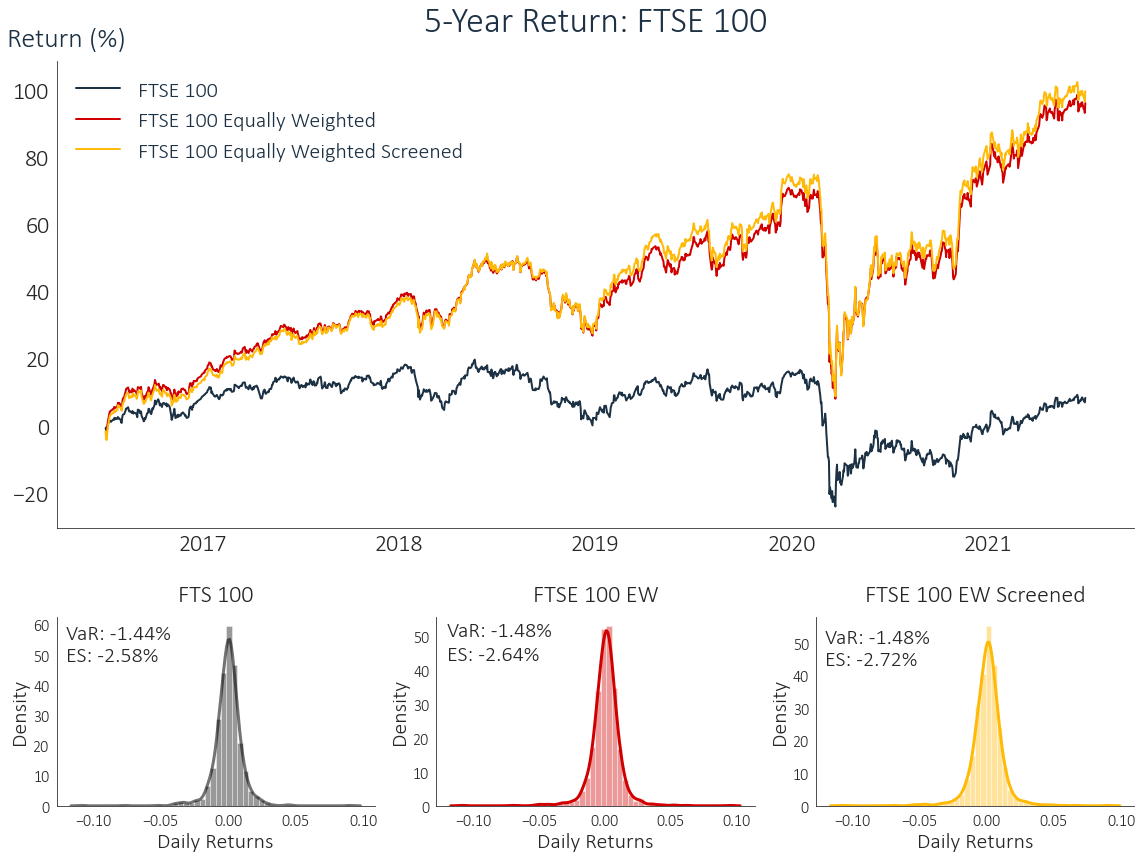

In [121]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot2grid((6, 3), (0,0), rowspan=4, colspan=3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.xticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2 = plt.subplot2grid((6, 3), (4,0), rowspan=2, colspan=1)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.set_title("FTS 100", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax3 = plt.subplot2grid((6, 3), (4,1), rowspan=2, colspan=1)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_title("FTSE 100 EW", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax4 = plt.subplot2grid((6, 3), (4,2), rowspan=2, colspan=1)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_title("FTSE 100 EW Screened", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)

ax1.set_ylabel('Return (%)', fontsize=28, fontname='Calibri', fontweight='light', labelpad=6, color='#1C3144', rotation='horizontal', horizontalalignment='left', y=1.02)

ax1.set_title(label='5-Year Return: FTSE 100', fontsize=36, color='#1C3144', fontname='Calibri', weight='ultralight', y=1.05)
ax1.plot(cumu_ftse, color='#1C3144', lw=2, label='FTSE 100')
ax1.plot(cumu_balanced, color='#D00000', lw=2, label='FTSE 100 Equally Weighted')
ax1.plot(cumu_screened, color='#FFBA08', lw=2, label='FTSE 100 Equally Weighted Screened')
L = ax1.legend(frameon=False, loc='upper left', fontsize=22)
plt.setp(L.texts, family='Calibri', weight='light', color='#1C3144')

sns.distplot(ftse_portfolio, color=(0,0,0,0.55), bins=50, ax=ax2, kde_kws=dict(linewidth=3))
sns.distplot(balanced_portfolio, color='#D00000', bins=50, ax=ax3, kde_kws=dict(linewidth=3))
sns.distplot(screened_portfolio, color='#FFBA08', bins=50, ax=ax4, kde_kws=dict(linewidth=3))

ax2.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.text(x=-0.12, y=55, s='VaR: -1.44%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax2.text(x=-0.12, y=48, s='ES: -2.58%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax3.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.text(x=-0.12, y=50, s='VaR: -1.48%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax3.text(x=-0.12, y=43, s='ES: -2.64%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax4.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.text(x=-0.12, y=50, s='VaR: -1.48%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax4.text(x=-0.12, y=43, s='ES: -2.72%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax2.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))


plt.tight_layout(h_pad=3)

plt.savefig('FTSE_Graph.jpeg', format='jpeg', dpi=500)

In [49]:
expected_shortfall(balanced_portfolio)

VaR: FTSE 100 Balanced   -0.014737
Name: 0.05, dtype: float64


FTSE 100 Balanced   -0.026508
dtype: float64

In [105]:
""" SMALLER CAP INDEX - WITH QUARTRERLY REBALANCING SO COMPARISON TO EW INDEX IS MORE COMPARABLE THAT RAW INDEX. SCREENED
    INDEX REPLICATES FTSE 100 VERY CLOSELY MARKET CAP BARRIER TO ENTRY -1.4767 -1.4808
"""

' SMALLER CAP INDEX - WITH QUARTRERLY REBALANCING SO COMPARISON TO EW INDEX IS MORE COMPARABLE THAT RAW INDEX. SCREENED\n    INDEX REPLICATES FTSE 100 VERY CLOSELY MARKET CAP BARRIER TO ENTRY\n'

In [122]:
cumu_screened.tail(3)

,Nasdaq 100 Screened
Date,
2021-06-29,98.138606
2021-06-30,96.781899
2021-07-01,99.819897


In [121]:
from scipy import stats
# Y and Z are numpy arrays or lists of variables 
stats.pearsonr(cumu_balanced['Nasdaq 100 Balanced'], cumu_screened['Nasdaq 100 Screened'].iloc[1:])

(0.9958255371996921, 0.0)

In [113]:
len(cumu_screened['Nasdaq 100 Screened'])

1264

In [120]:
cumu_screened.iloc[1:]

,Nasdaq 100 Screened
Date,
2016-07-05,-3.554844
2016-07-06,-4.250440
2016-07-07,-2.553606
2016-07-08,-0.578069
2016-07-11,2.286929
...,...
2021-06-25,99.982770
2021-06-28,97.923203
2021-06-29,98.138606


In [50]:
cumu_screened

,FTSE 100 Screened
Date,
2016-07-04,-1.621315
2016-07-05,-3.397043
2016-07-06,-4.062581
2016-07-07,-2.438544
2016-07-08,-0.549235
...,...
2021-06-25,101.921280
2021-06-28,99.951682
2021-06-29,100.246797


In [122]:
returns_frame = pd.concat([ftse_portfolio, balanced_portfolio, screened_portfolio], axis=1)
returns_frame.to_csv('ftse100_returns_dataframe.csv')

In [90]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    print(sigma*sigma)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.01 #1% risk free rate

In [91]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

In [92]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

In [93]:
sharpes = []
for col in returns_frame:
    sharpe = sharpe_ratio(returns_frame[col], N, rf)
    sharpes.append(sharpe)

0.02794043670063178
1.8604973821774329
1.316365720718488


In [94]:
sortinos = []
for col in returns_frame:
    sortino = sortino_ratio(returns_frame[col], N, rf)
    sortinos.append(sortino)

In [95]:
dds = []
for col in returns_frame:
    dd = max_drawdown(returns_frame[col])
    dds.append(dd)

In [96]:
returns_frame.columns

Index(['FTSE 100', 'FTSE 100 Balanced', 'FTSE 100 Screened'], dtype='object')

In [97]:
calmars = [0, 0, 0]
calmars[0] = returns_frame['FTSE 100'].mean()*255/abs(-0.33924960006097205)
calmars[1] = returns_frame['FTSE 100 Balanced'].mean()*255/abs(-0.3900637330909167)
calmars[2] = returns_frame['FTSE 100 Screened'].mean()*255/abs(-0.3864815399423005)
calmars

[0.08900073012097175, 1.9242587588827382, 1.6991749392235245]

In [98]:
var = [0, 0, 0]
var[0] = value_at_risk(ftse_portfolio)
var[1] = value_at_risk(balanced_portfolio)
var[2] = value_at_risk(screened_portfolio)
var

VaR: FTSE 100   -0.01443
Name: 0.05, dtype: float64
VaR: FTSE 100 Balanced   -0.014866
Name: 0.05, dtype: float64
VaR: FTSE 100 Screened   -0.015066
Name: 0.05, dtype: float64


[-0.014430348299679596, -0.014866215267751929, -0.015066467634367777]

In [99]:
es = [0, 0, 0]
es[0] = expected_shortfall(ftse_portfolio)
es[1] = expected_shortfall(balanced_portfolio)
es[2] = expected_shortfall(screened_portfolio)
es

VaR: FTSE 100   -0.01443
Name: 0.05, dtype: float64
VaR: FTSE 100 Balanced   -0.014866
Name: 0.05, dtype: float64
VaR: FTSE 100 Screened   -0.015066
Name: 0.05, dtype: float64


[-0.025791926481425254, -0.02681612632309033, -0.027594606679781537]

In [100]:
vols = [0, 0, 0]
vols[0] = round(ftse_portfolio * np.sqrt(252), 2)
vols[1] = round(balanced_portfolio * np.sqrt(252), 2)
vols[2] = round(screened_portfolio * np.sqrt(252), 2)
vols

[            FTSE 100
 Date                
 2016-07-04     -0.13
 2016-07-05      0.06
 2016-07-06     -0.20
 2016-07-07      0.17
 2016-07-08      0.14
 ...              ...
 2021-06-25      0.06
 2021-06-28     -0.14
 2021-06-29      0.03
 2021-06-30     -0.11
 2021-07-01      0.20
 
 [1264 rows x 1 columns],
             FTSE 100 Balanced
 Date                         
 2016-07-05              -0.25
 2016-07-06              -0.14
 2016-07-07               0.26
 2016-07-08               0.28
 2016-07-11               0.41
 ...                       ...
 2021-06-25               0.04
 2021-06-28              -0.16
 2021-06-29               0.02
 2021-06-30              -0.11
 2021-07-01               0.23
 
 [1263 rows x 1 columns],
             FTSE 100 Screened
 Date                         
 2016-07-04              -0.28
 2016-07-05              -0.31
 2016-07-06              -0.12
 2016-07-07               0.28
 2016-07-08               0.32
 ...                       ...
 2021-0

In [101]:
btstats = pd.DataFrame()
btstats['Sortino'] = sortinos
btstats['Sharpe'] = sharpes
btstats['Calmar'] = calmars
btstats['Max DD'] = dds
btstats['VaR'] = var
btstats['ES'] = es

btstats['temp'] = ['FTSE 100', 'FTSE EW', 'FTSE EW Screened']
btstats.set_index('temp', inplace=True)

In [102]:
btstats

,Sortino,Sharpe,Calmar,Max DD,VaR,ES
temp,,,,,,
FTSE 100,0.142797,0.120808,0.089001,-0.366055,-0.014430,-0.025792
FTSE EW,4.935558,0.542950,1.924259,-0.363963,-0.014866,-0.026816
FTSE EW Screened,4.214926,0.563656,1.699175,-0.376426,-0.015066,-0.027595


In [75]:
for col in returns_frame:
    annualised_stdev = round(col * np.sqrt(252),2)
    print(annualised_stdev)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [103]:
import pyfolio as pf

C:\Users\44738\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [123]:
returns_csv = pd.read_csv('ftse100_returns_dataframe.csv')
returns_csv['Date'] = pd.to_datetime(returns_csv['Date'])
returns_csv.set_index('Date', inplace=True)

Start date,2016-07-04
End date,2021-07-01
Total months,60
,Backtest
Annual return,14.8%
Cumulative returns,99.8%
Annual volatility,18.3%
Sharpe ratio,0.85
Calmar ratio,0.39
Stability,0.78
Max drawdown,-37.9%


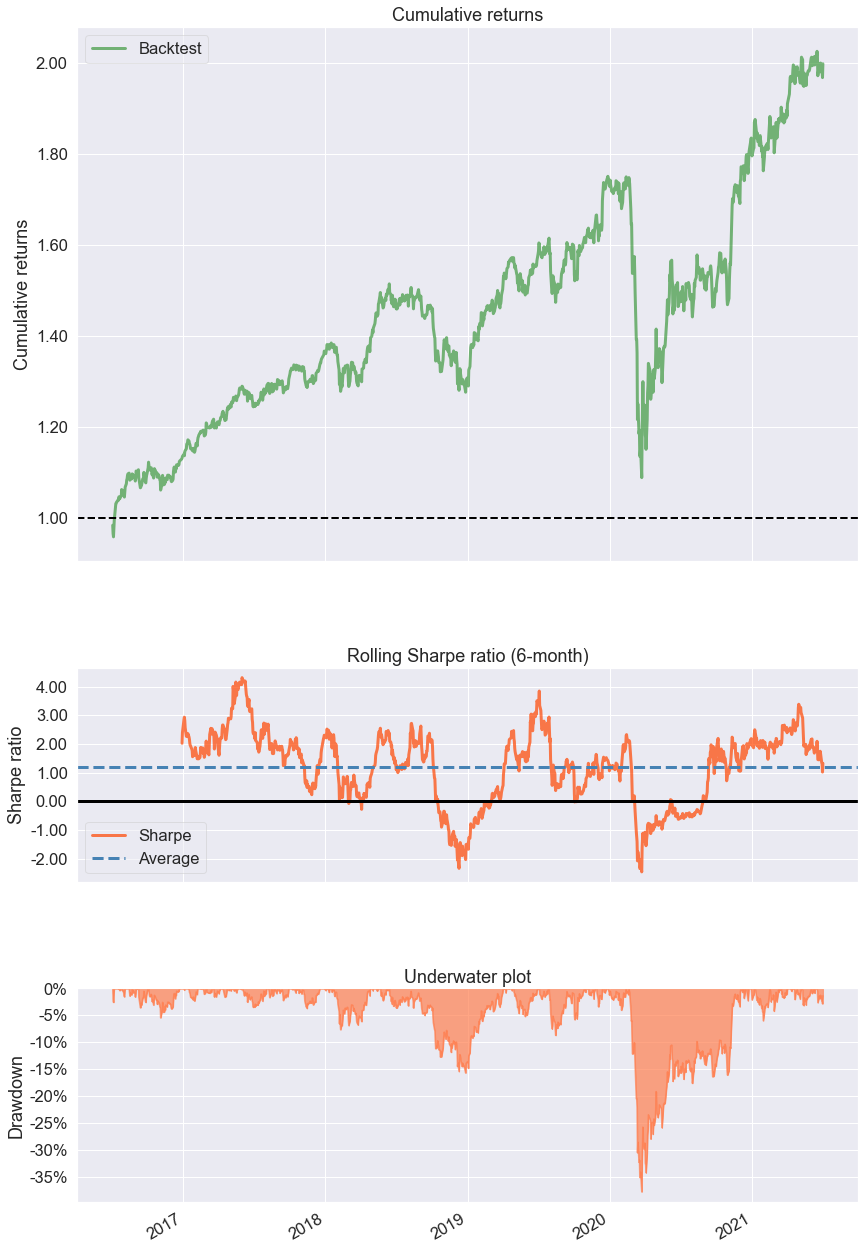

In [126]:
pf.create_simple_tear_sheet(returns_csv['FTSE 100 Screened'])